In [1]:
from statsmodels.formula.api import ols
from numpy import log
import pandas as pd

In [2]:
df = pd.read_excel('safety.xlsx')
df.head()

,risk,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30
1,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,115,5500,18,22
2,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,3.19,3.4,8.5,110,5500,19,25
3,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,3.13,3.4,8.3,140,5500,17,20
4,2,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,3.50,2.8,8.8,101,5800,23,29


In [3]:
df['ll'] = log(df.length)
ols('risk ~ ll', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     19.53
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.84e-05
Time:                        14:25:44   Log-Likelihood:                -243.86
No. Observations:                 159   AIC:                             491.7
Df Residuals:                     157   BIC:                             497.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0794      6.866      4.527      0.000      17.518      44.641
ll            -5.8946      1.334     -4.420      0.000      -8.529      -3.260
==============================================================================
Omnibus:                       10.528   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.388
Skew:                           0.654   Prob(JB):                      0.00337
Kurtosis:                       2.908   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
ols('risk ~ log(length)', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     19.53
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.84e-05
Time:                        14:25:44   Log-Likelihood:                -243.86
No. Observations:                 159   AIC:                             491.7
Df Residuals:                     157   BIC:                             497.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.0794      6.866      4.527      0.000      17.518      44.641
log(length)    -5.8946      1.334     -4.420      0.000      -8.529      -3.260
==============================================================================
Omnibus:                       10.528   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.388
Skew:                           0.654   Prob(JB):                      0.00337
Kurtosis:                       2.908   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## I함수

### 더하기

In [5]:
ols('risk ~ I(length + width)', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     18.66
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.76e-05
Time:                        14:25:44   Log-Likelihood:                -244.25
No. Observations:                 159   AIC:                             492.5
Df Residuals:                     157   BIC:                             498.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.7480      1.626      4.766      0.000       4.537      10.959
I(length + width)    -0.0295      0.007     -4.320      0.000      -0.043      -0.016
==============================================================================
Omnibus:                       10.173   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.954
Skew:                           0.641   Prob(JB):                      0.00418
Kurtosis:                       2.905   Cond. No.                     4.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 단위 바꾸기

- length가 인치인 경우 cm로 바꾸고 싶다면 2.54를 곱한다

In [6]:
ols('risk ~ I(length * 2.54)', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     20.01
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.47e-05
Time:                        14:25:44   Log-Likelihood:                -243.64
No. Observations:                 159   AIC:                             491.3
Df Residuals:                     157   BIC:                             497.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.7385      1.345      5.011      0.000       4.082       9.395
I(length * 2.54)    -0.0137      0.003     -4.474      0.000      -0.020      -0.008
==============================================================================
Omnibus:                       10.632   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.510
Skew:                           0.658   Prob(JB):                      0.00317
Kurtosis:                       2.915   Cond. No.                     6.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df2 = pd.read_excel('small_used_car.xlsx')

- 중고차 데이터에서 가격은 만원단위고, 보험처리된 손해액은 원 단위로 되어있다.

In [8]:
df2.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [9]:
ols('price ~ my_car_damage', data = df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     57.85
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.63e-13
Time:                        14:25:44   Log-Likelihood:                -1953.0
No. Observations:                 274   AIC:                             3910.
Df Residuals:                     272   BIC:                             3917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       958.5554     22.899     41.860      0.000     913.473    1003.637
my_car_damage -4.522e-05   5.95e-06     -7.606      0.000   -5.69e-05   -3.35e-05
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.363
Skew:                           0.372   Prob(JB):                       0.0415
Kurtosis:                       3.054   Cond. No.                     4.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
ols('price ~ I(my_car_damage / 10000)', data = df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     57.85
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.63e-13
Time:                        14:25:44   Log-Likelihood:                -1953.0
No. Observations:                 274   AIC:                             3910.
Df Residuals:                     272   BIC:                             3917.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  958.5554     22.899     41.860      0.000     913.473    1003.637
I(my_car_damage / 10000)    -0.4522      0.059     -7.606      0.000      -0.569      -0.335
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.363
Skew:                           0.372   Prob(JB):                       0.0415
Kurtosis:                       3.054   Cond. No.                         482.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- my car와 other car의 단위를 통일시켜서 my car damage의 기울기를 완만하게 만들었다.
- 단위를 통일시키면 읽기가 편하다

In [11]:
ols('price ~ year', data = df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.39e-70
Time:                        14:25:44   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.135e+05   8771.400    -24.341      0.000   -2.31e+05   -1.96e+05
year         106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 말이되는 절편으로 만들어보자

In [12]:
ols('price ~I(year - 2010)', data = df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.39e-70
Time:                        14:25:45   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        505.0926     18.172     27.794      0.000     469.316     540.869
I(year - 2010)   106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                         6.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 절편이 바뀌었다.
- 2010년 가격이 절편이 된다. (변수가 0이 될 때 나오는게 절편 값이므로)
- (year - 2010)을 하면 y축을 우측이동 시키는 것과 같은 효과!

## 절편의 고정
y ~ 0 + x

절편을 0으로 고정

기울기가 달라짐 -> 분석결과가 바뀜

In [13]:
ols('price ~ 0 + year', data = df2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1816.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                   1.18e-122
Time:                        14:25:45   Log-Likelihood:                         -1978.7
No. Observations:                 274   AIC:                                      3959.
Df Residuals:                     273   BIC:                                      3963.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.4242      0.010     42.618      0.000       0.405       0.444
==============================================================================
Omnibus:                        9.497   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.958
Skew:                           0.465   Prob(JB):                      0.00688
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 절편을 임의의 값으로 고정
I(y - 1) ~ 0 + x
절편을 1로 고정하는 것과 같음

쓸 일이 많지 않음

# 위 복습
## 데이터를 원하는대로 변형하는 방법
- 원본 데이터에 변형을 한다
- 관계식에 써준다 (우리가 위에서 배운 것)
    - 기존 함수를 적용하는 방법(예: lox(x)
    - 간단한 산식을 적용하는 방법(예: I(x-1))

원본 데이터에는 국영수 점수가 있는데, 나는 총점을 분석에 넣고 싶다. 그러면, I(국 + 영 + 수)라고 하면 국영수의 총점이 분석에 포함된다

## 절편의 고정과 2차식 실습
- 제동거리 데이터를 다운받아 speed를 독립변수로 dist를 종속변수로 회귀분석을 해보십시오.

- 이때 절편은 0으로 고정하고, 속도 speed와 속도의 제곱 speed ** 2을 모두 독립변수에 추가하여 2차식 형태로 회귀분석을 해보세요.

In [14]:
df3 = pd.read_excel('speed.xlsx')
df3.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


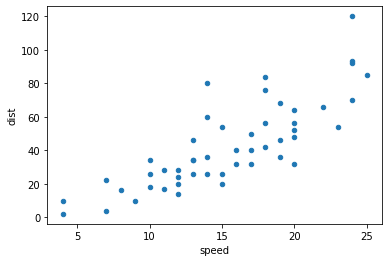

In [15]:
df3.plot.scatter('speed', 'dist')

- 1차식인지 2차식인지 알기가 어려움

In [16]:
ols('dist ~ speed', data = df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.49e-12
Time:                        14:25:47   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
ols('dist ~ 0 + speed + I(speed**2)', data = df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              252.8
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                    3.27e-26
Time:                        14:25:47   Log-Likelihood:                         -205.40
No. Observations:                  50   AIC:                                      414.8
Df Residuals:                      48   BIC:                                      418.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
speed             1.2390      0.560      2.213      0.032       0.113       2.365
I(speed ** 2)     0.0901      0.029      3.067      0.004       0.031       0.149
==============================================================================
Omnibus:                       10.823   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.587
Skew:                           0.971   Prob(JB):                      0.00502
Kurtosis:                       4.144   Cond. No.                         81.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.09*(속도제곱) +  1.239*(속도)

In [18]:
ols('dist ~ 0 + speed', data = df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                    9.23e-26
Time:                        14:25:47   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9091      0.141     20.578      0.000       2.625       3.193
==============================================================================
Omnibus:                       14.345   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.573
Skew:                           1.202   Prob(JB):                     0.000415
Kurtosis:                       4.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

길이의 평균과 표준편차

In [19]:
df.length.mean(), df.length.std()

(172.41383647798736, 11.523176853998827)

폭의 평균과 표준편차

In [21]:
df.width.mean(), df.width.std()

(65.60754716981134, 1.9478825624742644)

In [23]:
ols('risk ~ length + width', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     11.28
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.67e-05
Time:                        14:27:36   Log-Likelihood:                -242.45
No. Observations:                 159   AIC:                             490.9
Df Residuals:                     156   BIC:                             500.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4168      3.712      0.382      0.703      -5.915       8.749
length        -0.0531      0.014     -3.738      0.000      -0.081      -0.025
width          0.1292      0.084      1.537      0.126      -0.037       0.295
==============================================================================
Omnibus:                       10.622   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.467
Skew:                           0.657   Prob(JB):                      0.00324
Kurtosis:                       2.937   Cond. No.                     7.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 키가 10cm 차이나는 것과, 재산에서 10원이 차이나는 것이 다른 것처럼
- 차의 length와 width 역시 차이가 나는 비율이 중요하다.

- 그래서 표준화!

In [25]:
ols('risk ~ scale(length) + scale(width)', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     11.28
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.67e-05
Time:                        14:29:44   Log-Likelihood:                -242.45
No. Observations:                 159   AIC:                             490.9
Df Residuals:                     156   BIC:                             500.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7358      0.089      8.267      0.000       0.560       0.912
scale(length)    -0.6103      0.163     -3.738      0.000      -0.933      -0.288
scale(width)      0.2510      0.163      1.537      0.126      -0.072       0.573
==============================================================================
Omnibus:                       10.622   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.467
Skew:                           0.657   Prob(JB):                      0.00324
Kurtosis:                       2.937   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 길이가 1표준편차 df.length.std() 증가하면 위험도가 0.6 감소
- 폭이 1표준편차가 증가하면 위험도 0.25 증가
- 길이의 영향이 폭의 영향보다 크다


- 표준화 이후 절편 의미의 변화: 평균적인 길이에 평균적인 폭을 가진 자동차의 위험도


- 무엇이 더 중요한지 비교하고플땐 **표준화회귀변수**


- 표점이 작으면 변별력이 낮고, 표점이 크면 변별력이 크고

- 표준화한 기울기 -.6103 : 1표준편차 증가할 때 종속변수 변화
- 원래의 기울기 -.0531 = 표준화한 기울기 / 표준편차 : 1인치 증가할 때 종속변수의 변화

## 표준화 효과
1) 원래는 길이 = 0일때가 절편이었는데 -> 길이 = 평균일때가 절편으로 바뀜

2) 서로 단위가 다르거나 퍼진 정도가 다른 변수들을 **동일 기준에서 기울기 비교 가능**

## 서열로 변환 후 회귀분석

- 길이를 순서대로 등수를 매기고, 폭도 등수를 매겨서 그 등수로 회귀분석
- 표준화와는 다르게, 분석에 대한 해석이 달라진다
- 표준화는 원래 간격을 존중하지만, 서열 변환은 원래 간격을 무시하고 등간격(1등 2등,,)을 매기기 때문

# 표준화 실습

In [26]:
df3 = pd.read_excel('small_used_car.xlsx')
df3.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [28]:
ols('price ~ scale(year) + scale(mileage)', data = df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           5.62e-82
Time:                        15:24:20   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        853.6606     10.112     84.419      0.000     833.752     873.569
scale(year)      218.1006     12.306     17.724      0.000     193.874     242.327
scale(mileage)  -100.2044     12.306     -8.143      0.000    -124.431     -75.978
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                         1.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept: 평균적인 연식과 평균적인 주행거리면 차가 853만원에 거래된다.
- scale(year): 1표준편차가 증가할때마다 218만원 더 비싸게 팔 수 있다.
- scale(mileage): 1표준편차가 증가할때마다 100만원을 더 싸게 팔아야한다.
- 신나게 타고 하루라도 빨리 팔아치우는게 이득. year의 임팩트가 mileage의 임팩트보다 크기 때문. 계속 가만히 갖고있을 수록 218만원씩 빠지는 것.

In [29]:
ols('price ~ year + mileage', data = df3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           5.62e-82
Time:                        15:24:34   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.688e+05   9597.865    -17.592      0.000   -1.88e+05    -1.5e+05
year          84.3822      4.761     17.724      0.000      75.009      93.755
mileage       -0.0023      0.000     -8.143      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                     8.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
ols('price ~ scale(year) + scale(mileage)', data = df3).fit().rsquared

0.7486005251564052

In [35]:
ols('price ~ year + mileage', data = df3).fit().rsquared

0.7486005251564053